<FONT COLOR="RED">

    TO DO
    
 - The KMEAN contains a draft of what we can say. We need to review it and make it in English
        
    
 - Then we copy-smart to the Aggl. Clustering
    
 - Insert the images dow to the conclusion.
    
 - Insert TOC
    
  - Review and check grammar
   </FONT>

## <font color=maroon>Business Purpose</font><a class="anchor" id="Section1"></a>


Previously in this study, we have explored our data set with the intent of understanding the underlying factors behind employee promotability. We have used classification models to predict both employee promotability and an estimated time window for an employee's subsequent promotion. We have also touched on initial ideas for reporting and deploying these models for employee promotability. 

One feature that was isolated from our prior analysis was employee attrition. This feature was removed in our classification activity because an inherent assumption of promotability and a promotion window is employee retention. In order to capture a holistic view of our employee base, we realize the need to understand the features upon which employee attrition is associated. 

As a result, the purpose of this study is to launch a deep dive into understanding factors influencing employee attrition, especially for employees with potential<sup>*</sup>. We reintroduce the <Strong>voluntary attrition</strong> feature to our dataset and use a clustering approach to determine the key differences between those that did and did not attrit. The new feature distinguishes employees that chose to separate from the company versus employees that are dismissed based on performance or organizational change. The intention here is to 1) identify key correlations between features and attrition and 2) provide support for organizational and structural changes in order to boost employee retention. 


<br>

<sup>*</sup> Employees with potential here are defined as those who have received a promotion and thus are on track to a subsequent promotion. 


[Back to Table of Contents](#TOC)


## <font color=maroon>Data Understanding</font><a class="anchor" id="Section2"></a>

To better understand the key nuances within our dataset, we filter out features that are categorical in nature. These features will not provide much value as they are inherently a classification of their own. 

In prior analysis to understand our employees, we quarantined our features according to a total of eight themes. These features will be reunited for the purpose of this study. This allows us to look at our dataset in a comprehensive manner, as clusters will take into account all themes rather than potentially partitioning and diluting any meaningful insights that may arise. 

Below is a data dictionary of all the (non-categorical) attributes available within this obtained dataset that are used for clustering.
 
As for attribute types, nominal largely indicates the factor-level names of our attributes (i.e. for workers, names of each worker). In some instances, nominal also indicates the binary aspects of our attributes, such as whether or not a person received a promotion. We also have interval data, which represents data in a span of time, ratio data, which represents interval data with respect to an absolute 0 value, and ordinal data, which represents categorical data. 


[Back to Table of Contents](#TOC)


### <i>Data Dictionary</i><a class="anchor" id="DP_Dict"></a>



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-dvpl{border-color:inherit;text-align:left;vertical-align:top}
.rendered_html .table.tg { text-align: left; }  <!-- This overrides the right align -->

</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Attribute</th>
    <th class="tg-c3ow">Type</th>
    <th class="tg-c3ow">Unique Values</th>
    <th class="tg-c3ow">Range</th>
    <th class="tg-0pky">Description</th>
  </tr>
 <tr>
    <td class="tg-0pky">ppa_rating_last</td>
    <td class="tg-c3ow">Ordinal</td>
    <td class="tg-dvpl">9</td>
    <td class="tg-dvpl">0-5</td>
    <td class="tg-0pky">The most recent performance rating the person received. The rating goes from 1 (poor) to 5 (excellent)</td>
  </tr>
  <tr>
    <td class="tg-0pky">comparatio_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">11940</td>
    <td class="tg-dvpl">0-6190</td>
    <td class="tg-0pky">The most recent comparatio of the person. Comparatio is the ratio between the person salary and a predefined target salary for the job and country the employee mapped into. This value has been anonymized and scaled.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_points_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">13</td>
    <td class="tg-dvpl">0-35</td>
    <td class="tg-0pky">Number of events of awards in form of 'Points' received during the month. Points is a form of small and immediate monetary recognition. Points can be converted into products.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_points_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">456</td>
    <td class="tg-dvpl">0-5250</td>
    <td class="tg-0pky">Number of Points received during the month</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_bonus_cnt_sum_last </td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">6</td>
    <td class="tg-dvpl">0-5</td>
    <td class="tg-0pky">Number of events of awards in form of monetary bonus received during the month.</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_bonus_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">1558</td>
    <td class="tg-dvpl">0-205.76</td>
    <td class="tg-0pky">Amount of awards in form of monetary bonus received during the month.  This value has been scaled to grant anonymity of data</td>
  </tr>
  <tr>
    <td class="tg-0pky">awards_peer_cnt_sum_cnt</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">32</td>
    <td class="tg-dvpl">0-36</td>
    <td class="tg-0pky">Number of&nbsp;&nbsp;peer recognition received. A Peer recognition is non-monetary form of recognition given between employees</td>
  </tr>
  <tr>
    <td class="tg-0pky">movement_lateral_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-5</td>
    <td class="tg-0pky">Number of lateral moves received during the month. Lateral move is when an employees changes job but there is no change in the gjs_sort_order.</td>
  </tr>
  <tr>
    <td class="tg-0pky">movement_demote_event_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-2</td>
    <td class="tg-0pky">Number of demotion received during the month. A demotion is a change from one gjs_sort_order to an lower one.</td>
  </tr>
  <tr>
    <td class="tg-0pky">transfer_event_cnt_sum_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-1</td>
    <td class="tg-0pky">Number of transfers during the month. A Transfer is a change in group or Cost Center</td>
  </tr>
  <tr>
    <td class="tg-0pky">promotion_cnt</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">0-1</td>
    <td class="tg-0pky"> 1 if the person received a promotion, 0 if not. A promotion is a change from one gjs_sort_order to an higher one.</td>
  </tr>
  <tr>
    <td class="tg-0pky">supervisor_Y_last</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">N-Y</td>
    <td class="tg-0pky">Y if the person is currently a supervisor, N if is an individual contributor</td>
  </tr>
  <tr>
    <td class="tg-0pky">supervisor_Y_max</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">N-Y</td>
    <td class="tg-0pky">Y if the person is or has been a supervisor, N if was never been a a supervisor</td>
  </tr>
  <tr>
    <td class="tg-0pky">span_of_control_direct_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">165</td>
    <td class="tg-dvpl">0-1795</td>
    <td class="tg-0pky">Number of employees directly reporting to the individual</td>
  </tr>
  <tr>
    <td class="tg-0pky">span_of_control_total_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">1789</td>
    <td class="tg-dvpl">0-6731</td>
    <td class="tg-0pky">Number of employee directly and indirectly reporting to the individual</td>
  </tr>
  <tr>
    <td class="tg-0pky">spv_ppa_rating_last</td>
    <td class="tg-c3ow">Ordinal</td>
    <td class="tg-dvpl">9</td>
    <td class="tg-dvpl">0-5</td>
    <td class="tg-0pky">The most recent performance rating of the supervisor of the person . The rating goes from 1 (poor) to 5 (excellent)</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_country_code_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">29</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Count of countries where the person worked since last promotion. </td>
  </tr>
  <tr>
    <td class="tg-0pky">site_country_region_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of regions  where the person worked since last promotion</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_country_segment_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">13</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of country segments  where the person worked since last promotion</td>
  </tr>
  <tr>
    <td class="tg-0pky">site_city_code_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">321</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of cities where the person worked with</td>
  </tr>
    <tr>
    <td class="tg-0pky">site_desc_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">514</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of sites where the person worked with</td>
  </tr>
  <tr>
    <td class="tg-0pky">mgr_01_nunique - mgr_14_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">6984</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of distinct managers the person worker with, by organization chart of the the worker's. Mgr01 is the CEO and mgr02 is 2nd level, etc..</td>
  </tr>
  <tr>
    <td class="tg-0pky">supervisor_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2</td>
    <td class="tg-dvpl">N-Y</td>
    <td class="tg-0pky">Number of distinct supervisors the person worker with</td>
  </tr>
   <tr>
    <td class="tg-0pky">reporting_level_last</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">14</td>
    <td class="tg-dvpl">0-12</td>
    <td class="tg-0pky">Number of reporting levels up to the company CEO</td>
  </tr>
   <tr>
    <td class="tg-0pky">accountability_matrix_label_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">31</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of organizations the person workerd with</td>
  </tr>
  <tr>
    <td class="tg-0pky">company_code_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">57</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of company entities the person workerd with</td>
  </tr>
  <tr>
    <td class="tg-0pky">cost_center_code_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">2418</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of cost centers the person workerd with</td>
  </tr>
  <tr>
    <td class="tg-0pky">org_unit_desc_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of company's organizational units the person workerd with</td>
  </tr>
  <tr>
    <td class="tg-0pky">operational_rollup_label_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">4</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of company's operational groups (groups of organizational units) the person workerd with</td>
  </tr>
  <tr>
    <td class="tg-0pky">gjs_code_label_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">55</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of distinct Job Frameworks and levels the person has been mapped into</td>
  </tr>
  <tr>
    <td class="tg-0pky">gjs_framework_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">12</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of distinct Job Frameworks the person has been mapped into</td>
  </tr>
  <tr>
    <td class="tg-0pky">job_family_label_nunique</td>
    <td class="tg-c3ow">Nominal</td>
    <td class="tg-dvpl">459</td>
    <td class="tg-dvpl"></td>
    <td class="tg-0pky">Number of distinct Job Families the person has been mapped into</td>
  </tr>
  <tr>
    <td class="tg-0pky">tenure_in_months</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">614</td>
    <td class="tg-dvpl">0-1383</td>
    <td class="tg-0pky">Number of month of seniority in the company</td>
  </tr>
  <tr>
    <td class="tg-0pky">voluntary_attrition</td>
    <td class="tg-c3ow">Ratio</td>
    <td class="tg-dvpl">64841</td>
    <td class="tg-dvpl">5235-8336</td>
    <td class="tg-0pky">Contains 1 if the person voluntary left the company.</td>
  </tr>
 
</table>

[Back to Table of Contents](#TOC)


### <i>Basic Setup</i>

The basic setup for this project requires loading Python libraries and setting up logging for this notebook. We enabled logging throughout the notebook to help the debug process and interpretability of our data.




### <i>Loading Functions</i><a class="anchor" id="DP_Loading"></a>

These functions define repeatable processes used in this notebook. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import logging
import math

# Data Splitting
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit  # Only applicable for classification problem

# Preprocessing and Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Diagnosis
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Scoring
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mt

# for Model Comparison
from scipy.stats import t

# For Time Logging
import time
from contextlib import contextmanager

# For hyperparameter optimization
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
from skopt import gp_minimize
import skopt.plots

# The awesome more library!
from more import hyperopt_helper as hh
from more import viz_helper as vh
from more.scikit_helper.cluster import KMeansHelper as kmh
from more.scikit_helper.cluster import AgglomerativeHelper as agh  # only needed if using the agglomerative Helper

#cluseting library
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import cluster

In [2]:
%matplotlib inline
## Setup plot and logger
logging.getLogger().setLevel(logging.INFO)
plt.style.use('ggplot')


### <i>Data Processing</i><a class="anchor" id="DP_DP"></a>

**Removal of Unnecessary Features**: We limited this clustering practice to involve only continuous types, removing any categorical attributes in the process. This is because categorical attributes already are a type of cluster by proxy. This also allows a cleaner view into our employee types by having fewer potentially interacting or contradicting attributes. 

**Discretizing Target Variable** for this exploration task: Our data contains information on types of attrition in categorical format, which we redefined into the following discrete bins: 0 for non-attrited and 1 for voluntarily attrited.

**Feature Scaling:** In order to more easily determine cluster differences, we scaled the resulting attribute values for each cluster to better compare a potentially large range of values. This is especially helpful in visually depicting the cluster differences through a heatmap or other plot. 


#### Read in data file

In [3]:
# Reading data 
df_pre = pd.read_csv("../../data/data_for_classification.csv")
df_term = pd.read_csv("../../data/voluntary_attrition.csv")

In [4]:
# Sample of Termination records
df_term.head()

,worker,term_type,term_text
0,ADOQOR,Voluntary,Resign-Career
1,BHOKOZ,Voluntary,Resign-Career
2,AMKNPQ,Voluntary,Resign-Personal
3,AMNJRU,Voluntary,Resign-Relocation
4,AMNMSX,Voluntary,Resign-Relocation


#### Adding voluntary Termination Column

In [5]:
df_term_vol = df_term[df_term['term_type'].isin(['Voluntary'])][['worker']] #the dataset contains only voluntary, but we can eventually externd to other types
df_term_vol['voluntary_attrition']=1
df_term_vol.shape

(21807, 2)

In [6]:
df=df_pre.set_index('worker').join(df_term_vol.set_index('worker')).reset_index()
df['voluntary_attrition'].fillna(0,inplace=True)
df['voluntary_attrition'] = df['voluntary_attrition'].astype(int)

print('Count of Workers',df.shape[0])
print('Count of Voluntary Attrition',sum(df['voluntary_attrition']))
print('Ratio:',sum(df['voluntary_attrition'])/df.shape[0])


Count of Workers 94547
Count of Voluntary Attrition 25207
Ratio: 0.26660814198229454


#### Managing Nulls
Nulls can cause errors for some models, depending on the quantity we will drop records with null values.

In [7]:
null_vals = df.isnull().sum(axis = 0)
print(null_vals[null_vals != 0])
df.dropna(inplace=True)

reporting_level_last                 14
accountability_matrix_label_last      3
functional_area_last                  3
job_family_label_last                 5
job_long_text_last                    6
operational_rollup_label_last       192
org_unit_desc_last                   44
dtype: int64


In [8]:
df.columns

Index(['worker', 'Unnamed: 0', 'promotion_cnt', 'promotion_max', 'year_last',
       'month_num_last', 'hiredAfter200901_max', 'months_since_promotion_max',
       'months_since_promotion_last', 'comparatio_last',
       'span_of_control_direct_last', 'span_of_control_total_last',
       'movement_lateral_cnt_sum_last', 'movement_demote_event_cnt_sum_last',
       'transfer_event_cnt_sum_last', 'changed_spv_cnt_sum_last',
       'awards_points_cnt_sum_last', 'awards_points_sum_last',
       'awards_bonus_cnt_sum_last', 'awards_bonus_sum_last',
       'awards_peer_cnt_sum_last', 'reporting_level_last', 'supervisor_Y_last',
       'supervisor_Y_max', 'tenure_in_months_last',
       'accountability_matrix_label_last',
       'accountability_matrix_label_nunique', 'company_code_last',
       'company_code_nunique', 'cost_center_code_last',
       'cost_center_code_nunique', 'functional_area_last',
       'functional_area_nunique', 'supervisor_last', 'supervisor_nunique',
       'mgr_01_nun

**Solution:** Dropping nulls as they comprise approximately <0.2% of the data

#### Review number of levels in categorical features
We will review the counts of the levels of categorical features with the SME and determine which ones can be removed. 

In [9]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['worker', 'accountability_matrix_label_last', 'company_code_last',
       'cost_center_code_last', 'functional_area_last', 'supervisor_last',
       'gjs_code_label_last', 'gjs_framework_last', 'job_family_label_last',
       'job_long_text_last', 'operational_rollup_label_last',
       'org_unit_desc_last', 'site_city_code_last', 'site_country_code_last',
       'site_country_region_last', 'site_country_segment_last',
       'site_desc_last', 'certificate_order_grp_last'],
      dtype='object')

In [10]:
for column in categorical_features:
    if column in df.columns:
        print ("The number of levels in column '{}': {}".format(column,df[column].nunique()))

The number of levels in column 'worker': 66927
The number of levels in column 'accountability_matrix_label_last': 29
The number of levels in column 'company_code_last': 50
The number of levels in column 'cost_center_code_last': 1943
The number of levels in column 'functional_area_last': 3
The number of levels in column 'supervisor_last': 9755
The number of levels in column 'gjs_code_label_last': 43
The number of levels in column 'gjs_framework_last': 9
The number of levels in column 'job_family_label_last': 199
The number of levels in column 'job_long_text_last': 1506
The number of levels in column 'operational_rollup_label_last': 162
The number of levels in column 'org_unit_desc_last': 8342
The number of levels in column 'site_city_code_last': 224
The number of levels in column 'site_country_code_last': 28
The number of levels in column 'site_country_region_last': 3
The number of levels in column 'site_country_segment_last': 11
The number of levels in column 'site_desc_last': 318
The 


**Solution:** 
- Drop 'supervisor_last' as we dont need the names (identifiers) of the last managers
- Drop 'site_city_code_last' as country is more meaningful than city and city anyway has more variation
- Drop 'site_desc_last' as this refers to different buildings which will not impact promotion
- Drop 'org_unit_desc_last' as accountability matrix is more meaningful than org_unit and org_unit anyway has more variation
- Drop 'cost_center_code_last' as accountability matrix is more meaningful than cost_center and cost_center anyway has more variation
- Drop 'job_long_text_last' as gjs and gjs_family are more meaningful than job_long_txt and job_long_txt anyway has too many variations
- Drop 'Year Last','Month_num_last' and 'months_since_promotion_max' as they were determined to be highly correlated during initial data exploration project
- Drop 'worker' and 'unnamed: 0'  as these two fields are IDs of the rows and therefore not predictors
- Drop 'months_since_promtion_max', 'year_last', and  'month_num_last' since  they are cofounding with months_since_promotion_max and month columns, based on the exploration project
- Keep for now and analyze 'operational_rollup_label_last' (group of cost centers)
- Keep for now and analyze 'job_family_label_last' -- Group of Jobs

In [11]:
cols_to_del = ["supervisor_last"
               ,"org_unit_desc_last"
               ,"cost_center_code_last"
               ,"job_long_text_last"
               ,"site_city_code_last"
               ,"site_desc_last"  
               ,"year_last"
               ,"month_num_last"
               ,'months_since_promotion_max'
               ,"worker"
               ,"Unnamed: 0"
                ]
for column in df.columns:
    if column in cols_to_del:
        del df[column]

In [12]:
categorical_features = df.select_dtypes(include='object').columns
for column in categorical_features:
    if column in df.columns:
        print ("The number of levels in column '{}': {}".format(column,df[column].nunique()))

The number of levels in column 'accountability_matrix_label_last': 29
The number of levels in column 'company_code_last': 50
The number of levels in column 'functional_area_last': 3
The number of levels in column 'gjs_code_label_last': 43
The number of levels in column 'gjs_framework_last': 9
The number of levels in column 'job_family_label_last': 199
The number of levels in column 'operational_rollup_label_last': 162
The number of levels in column 'site_country_code_last': 28
The number of levels in column 'site_country_region_last': 3
The number of levels in column 'site_country_segment_last': 11
The number of levels in column 'certificate_order_grp_last': 14


  
#### Defining features by theme

In [13]:
# Theme 1

rating_related_subset = ['ppa_rating_last', 'comparatio_last'
                  ,'awards_points_cnt_sum_last','awards_points_sum_last'
                  ,'awards_bonus_cnt_sum_last','awards_bonus_sum_last'
                  ,'awards_peer_cnt_sum_last'
                 ,'movement_lateral_cnt_sum_last','transfer_event_cnt_sum_last','movement_demote_event_cnt_sum_last'
                 ,'promotion_cnt']

In [14]:
# Theme 2
supervision_related = ['supervisor_Y_max','supervisor_Y_last','span_of_control_direct_last'
                       ,'span_of_control_total_last','spv_ppa_rating_last']

In [15]:
# Theme 3

region_related_subset = [
    'site_country_region_nunique','site_country_segment_nunique','site_country_code_nunique','site_desc_nunique'
    ,'site_city_code_nunique']


In [16]:
# Theme 4
manager_related = ['mgr_01_nunique','mgr_02_nunique','mgr_03_nunique','mgr_04_nunique'
                          ,'mgr_05_nunique','mgr_06_nunique','mgr_07_nunique','mgr_08_nunique'
                          ,'mgr_09_nunique','mgr_10_nunique','mgr_11_nunique','mgr_12_nunique'
                          ,'supervisor_nunique','changed_spv_cnt_sum_last'
                         ,'reporting_level_last' ]



In [17]:
# Theme 5
func_area_related_subset = ['accountability_matrix_label_nunique'
                            ,'cost_center_code_nunique'
                            ,'operational_rollup_label_nunique'
                            ,'org_unit_desc_nunique']
                                                                          
                                                                          

In [18]:
# Theme 6
job_grade_related_subset = ['gjs_framework_nunique','job_family_label_nunique']

In [19]:
# Theme 7
tenure_related_subset = ['tenure_in_months_last']

In [20]:
# Theme 8
education_related_subset = ['school_tier_last']


#### Create dataset for Clustering (promotion window) Dataset

For this study, we looked into a dataset previously used that contains only the promoted employees (27,274 observations). The key variable to base our clusters on here is <b> voluntary_attrition </b>. 

In [63]:
df_cat2 = df[df['promotion_max']==1].drop('promotion_max',axis=1)
#df_cat2.info()

# <font color=maroon>CLUSTERING</font>

In [62]:
## Resetting the index, needed to avoid issues in the grouping and filters
df_cat2.reset_index(drop=True, inplace=True)
df_cat2.head()

,promotion_cnt,hiredAfter200901_max,months_since_promotion_last,comparatio_last,span_of_control_direct_last,span_of_control_total_last,movement_lateral_cnt_sum_last,movement_demote_event_cnt_sum_last,transfer_event_cnt_sum_last,changed_spv_cnt_sum_last,...,site_country_region_last,site_country_region_nunique,site_country_segment_last,site_country_segment_nunique,site_desc_nunique,ppa_rating_last,spv_ppa_rating_last,school_tier_last,certificate_order_grp_last,voluntary_attrition
0,1,0,13,0.9388,0,0,0,0,0,2,...,Asia,1,Taiwan,1,1,3.0,3.0,0.0,02-Master Level Degree,0
1,1,0,24,1.0278,9,46,0,0,0,2,...,Asia,1,Taiwan,1,1,3.0,3.0,1.0,02-Master Level Degree,0
2,1,0,35,1.0255,7,7,0,0,0,2,...,Asia,1,Japan,1,1,4.0,4.0,0.0,08-Bachelor Level Degree,0
3,0,1,49,0.8902,0,0,0,0,0,6,...,Asia,2,Japan,2,2,4.0,4.0,0.0,08-Bachelor Level Degree,0
4,0,1,46,0.8704,9,9,0,0,0,7,...,Asia,1,Japan,1,1,3.0,3.0,0.0,08-Bachelor Level Degree,0


### Defining Clustering Variables

Instead of creating multiple clusters by theme, we are merging all the theme variables for clustering. This allows us to look at our dataset in a comprehensive manner, as clusters will take into account all themes rather than potentially partitioning and diluting any meaningful insights that may arise.

In [24]:
# X = df_cat2[supervision_related + ['voluntary_attrition']]
# X.info()
from more import pandas_helper
cl_cols = rating_related_subset +  supervision_related + region_related_subset + manager_related \
          + func_area_related_subset + job_grade_related_subset + tenure_related_subset +  ['voluntary_attrition']

# X contains all the variables, including voluntary
X = df_cat2[cl_cols]

# Xbase is used for clustering and doens't contain voluntary column. 
Xbase = X
Xbase = Xbase.helper.drop_columns(['voluntary_attrition'])
Xbase.columns

Index(['ppa_rating_last', 'comparatio_last', 'awards_points_cnt_sum_last',
       'awards_points_sum_last', 'awards_bonus_cnt_sum_last',
       'awards_bonus_sum_last', 'awards_peer_cnt_sum_last',
       'movement_lateral_cnt_sum_last', 'transfer_event_cnt_sum_last',
       'movement_demote_event_cnt_sum_last', 'promotion_cnt',
       'supervisor_Y_max', 'supervisor_Y_last', 'span_of_control_direct_last',
       'span_of_control_total_last', 'spv_ppa_rating_last',
       'site_country_region_nunique', 'site_country_segment_nunique',
       'site_country_code_nunique', 'site_desc_nunique',
       'site_city_code_nunique', 'mgr_01_nunique', 'mgr_02_nunique',
       'mgr_03_nunique', 'mgr_04_nunique', 'mgr_05_nunique', 'mgr_06_nunique',
       'mgr_07_nunique', 'mgr_08_nunique', 'mgr_09_nunique', 'mgr_10_nunique',
       'mgr_11_nunique', 'mgr_12_nunique', 'supervisor_nunique',
       'changed_spv_cnt_sum_last', 'reporting_level_last',
       'accountability_matrix_label_nunique', 'cost_c

In [68]:
### TEMP REMOVE THIS ONE ###
Xbase['movement_demote_event_cnt_sum_last'].max()

2

In [25]:
max_jobs = 30  #Issue with the Max's Server when using jobs=-1 (who knows why?)



## <font color=maroon>Modeling and Evaluation</font><a class="anchor" id="Section3"></a>

#### Measure used for Models Evaluation
<FONT COLOR='red'> Very draft.. needs revision</font>

We had the need to identify a metric that can provide an objective method to select the best number of cluster, that balance the need of managable number of cluster and the optimal performance of the model

During our pre-analysis we found that the Slihoutte and Sum of Squares are the ideal measure to compare multiple models. At the same time we found that that while the Silouhette is biased toward low number of cluster, and the Sum of Square is bieased toward high number of clusters. To compasate for such bias, we created a custom metric that finds the ideal balance between the two measures.

The custom measure uses a normalized version of silhouette and Sum of Square scores. Silhouette score is normally between -1 and 1, we normlized such range from 0 to 1. Sum of Square has a range from 0 to the maximum variance of the whole dataset, we normlized such range from 0 to 1. Even with normlization we noticed that these two measure don't have equal range within our clusters, for example normalized slhouette may range betn 0.08 and 0.18 while the normlized Sum of Square ranges between 0.16 and 0.38. This situation will put to omuch waight on Sum of Square than silhoueet. To mitigate this risk we applied differnt weights on the two measures, based on their range across the clusters.

Once we defined the optimal weight we applied the same custom measure across all the models we used in this project.


### <i>K-Means Clustering</font></i>

We first tried the K-Means Clustering model as it is the most common and has good performance with many variables.

In [26]:
# Function to calculate Sum of Squares Measure as it is not available in all the models

def calc_SSB(X,labels,scaling=True):
    from scipy.cluster.vq import vq
    if(scaling):
        std_scl=StandardScaler()
        Xbase2= pd.DataFrame(std_scl.fit_transform(Xbase.astype(np.float)))
    else:
        Xbase2=Xbase
    #labels = ac_model.labels_
    num_features = Xbase2.shape[1]
    centers = np.empty((num_features,0))
    for i in range(len(set(labels[labels != -1]))):
        single_cluster_means = Xbase2[labels==i].mean().to_numpy().reshape(num_features,1)
        centers = np.concatenate((centers,single_cluster_means),axis=1,out=None)
    
    centers=centers.T
    partition, euc_distance_to_centroids = vq(obs=Xbase2,code_book=centers)
    
    TSS = np.sum((Xbase2-Xbase2.mean(0))**2)
    SSW = np.sum(euc_distance_to_centroids**2)
    SSB = TSS - SSW
    return(SSW)


In [27]:
#calculate the Overall variance on X, this is needed to normlize inertia (Sum of Squares)

labels = np.zeros((Xbase.shape[0]),np.int8)
Xbase_variance = calc_SSB(Xbase,labels,scaling=True)
print("Overall Variance is {}:".format(Xbase_variance))


Overall Variance is 1172782.0000000002:



#### Parameter Adjustments

<font color = coral> How did you determine a suitable number of clusters for this method?</font>

In order to determin the right number of clusters, we created a baseline model to compare with the other models. The base line uses the default peremeters of n_init = 10, max_iter=300, and n_cluster = 5


In [28]:
# Prepare baseline model 
kmeans = kmh(X=X.astype(np.float)
         ,n_clusters=5
         ,init =  'k-means++'
         ,evaluate_by='voluntary_attrition'
         ,n_jobs=max_jobs
         ,random_state=101
        )

cluster.KMeans()


Then we run an elbow curve to identify the best number of cluster we can use that mitigate the Silouette and the Sum of Square Measures. This curve maintains the n_init and max_iter paremeter as the baseline model

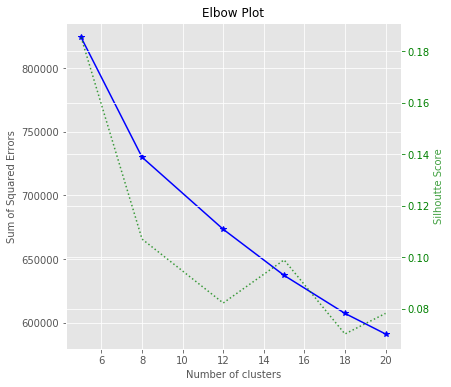

Wall time: 1min 24s


In [29]:
%%time
# Draw first elbow to calculate the weights between Siloutted and Sum of Squares

cluster_ranges=[5,8,12,15,18,20]

# Elbow Curve with Helper function
kmeans.plot_elbow_curve(cluster_ranges=cluster_ranges
                        ,second_metric='silhoutte'
                        ,n_jobs=max_jobs
                        ,figsize=(6,6)
                       ) 

The range of silhouette is .10 while the range of SSE is 220K = 0.18 normilized. Hence the best weight for siloughette is at .18/.10 = 1.8 ~ 2

With **5 clusters** we have an high slihouette score without impacting much the sum of squared error score. We run the base model with 5 clusters.

We are checking the number of observeation between cluster is significant

In [86]:
# Getting nubmer of observation per cluster to make sure the base model is not skewed
kmeans.train()
kmeans.cluster_obs_count()

labels
0      490
1    15588
2     6460
3     1232
4     3504
Name: ppa_rating_last, dtype: int64

We have enough discriminationa cross clusters and cluster have a sufficient nubmer of elements that are meaningful for the business problem.



In [79]:
## @NIKHIL.. we need to calculate the custom score for the baseline model.. how can we do with the helper function?


In [90]:
measure_i = kmeans.cluster_obj.inertia_ / Xbase_variance
measure_sbase = mt.silhouette_score(Xbase,kmeans.cluster_obj.labels_,random_state=101)
measure_s = -(measure_sbase+1)*.5 #range of silhoutte is -1 to 1
print("    -> base inertia {} base silhouette {}".format( kmeans.cluster_obj.inertia_,measure_sbase))
print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
measure =(measure_i*weight_i) +(measure_s*weight_s)
print("Base model custom measure ", measure)

    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Base model custom measure  -0.35319047272468274



The baseline model has a cusom score of: -0.3531

We now proceed to find a better selection of all  the parameters that can improve the score

In [31]:
#weights for siloutted and inertia (sum of squares)

weight_s = 2
weight_i = 1

# Define the space
space = [Integer(5, 20, name='n_clusters')
         ,Integer(10, 100, name='n_init')
         ,Integer(300, 500, name='max_iter')
        ]

# Define the objective function (loss function) to be minimized
@use_named_args(space)
def objective(**params):
    
    model = KMeans(init='k-means++'
                   ,random_state=101
                   ,n_jobs=max_jobs
                   ,**params)
    
    std_scl = StandardScaler()
    piped_object = Pipeline([('scale', std_scl),  # do this
                             ('kmeans_model', model)]) # and then do this

    print("    ",end="")
    for key, value in params.items():
        print("{} = {}".format(key, value),end=', ')
    print("")
    piped_object.fit(Xbase.astype(np.float))
    
    measure_i = model.inertia_ / Xbase_variance
    measure_sbase = mt.silhouette_score(Xbase,model.labels_,random_state=101)
    measure_s = -(measure_sbase+1)*.5 #range of silhoutte is -1 to 1
    print("    -> base inertia {} base silhouette {}".format( model.inertia_,measure_sbase))
    print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
    measure =(measure_i*weight_i) +(measure_s*weight_s)
    return (measure)

In [32]:
# Running the GridSearch

kmeans_gp = gp_minimize(objective,space
                        ,n_random_starts=10 # 10 random points to start 
                        ,n_calls=25 # pick 25 points total (including n_random_starts) to find optimal combination of hyperparameters
                        ,verbose=True
                        ,n_jobs=max_jobs
                        ,random_state=101)


Iteration No: 1 started. Evaluating function at random point.
    n_clusters = 13, n_init = 96, max_iter = 497, 
    -> base inertia 654666.870833647 base silhouette -0.10387459425302431
    -> norm inertia 0.5582170180252143 norm silhouette -0.4480627028734878
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 28.5163
Function value obtained: -0.3379
Current minimum: -0.3379
Iteration No: 2 started. Evaluating function at random point.
    n_clusters = 5, n_init = 58, max_iter = 358, 
    -> base inertia 824248.6433641842 base silhouette 0.05592894826024312
    -> norm inertia 0.7028148823602204 norm silhouette -0.5279644741301216
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 20.6876
Function value obtained: -0.3531
Current minimum: -0.3531
Iteration No: 3 started. Evaluating function at random point.
    n_clusters = 14, n_init = 34, max_iter = 456, 
    -> base inertia 645230.713411914 base silhouette -0.16797206544119572
    -> norm inertia 0.

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 500, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 22.3340
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 16 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 300, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 22.2880
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 17 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 500, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 23.0806
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 18 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 300, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 19.7789
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 19 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 500, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 18.4557
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 20 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 300, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 18.3997
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 21 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, n_init = 100, max_iter = 500, 
    -> base inertia 824247.7661258734 base silhouette 0.0560046070871416
    -> norm inertia 0.7028141343624589 norm silhouette -0.5280023035435708
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 21.1761
Function value obtained: -0.3532
Current minimum: -0.3532
Iteration No: 22 started. Searching for the next optimal point.
    n_clusters = 5, n_init = 10, max_iter = 300, 
    -> base inertia 824248.7381581147 base silhouette 0.055202046198254674
    -> norm inertia 0.7028149631884822 norm silhouette -0.5276010230991274
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 19.0432
Function value obtained: -0.3524
Current minimum: -0.3532
Iteration No: 23 started. Searching for the next optimal point.
    n_clusters = 20, n_init = 10, max_iter = 479, 
    -> base inertia 590982.7036125279 base silhouette -0.1716482594113696
    -> norm inertia 0.5039152234707966 norm silhouette -

In [33]:
#skopt.plots.plot_evaluations(kmeans_gp) ### just for for diags

In [34]:
#skopt.plots.plot_convergence(kmeans_gp) ### just for for diags

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265D05D86A0>,
      dtype=object)

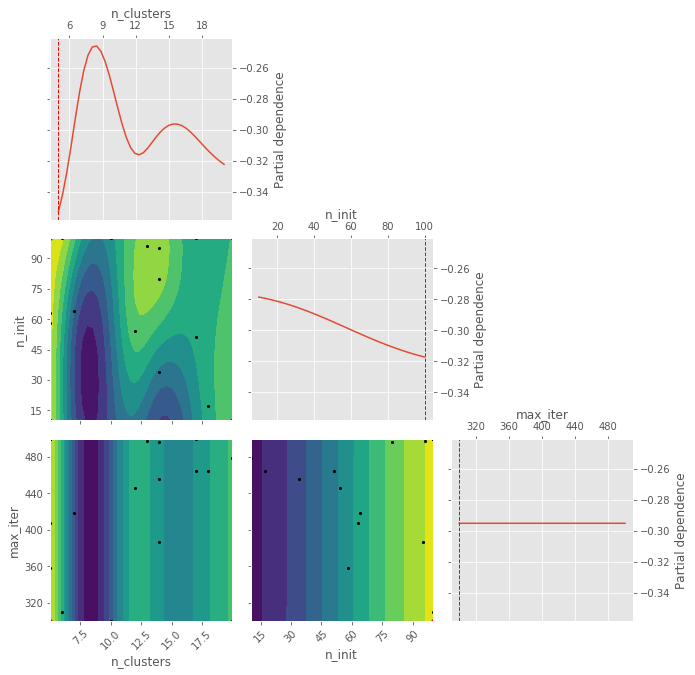

In [35]:
# Plotting the variable influence on the gridsearch

skopt.plots.plot_objective(kmeans_gp, size=3, dimensions=['n_clusters','n_init','max_iter'])

In [36]:
print('Best score: {} | Best params: {}'.format(kmeans_gp.fun, kmeans_gp.x))

Best score: -0.35319047272468274 | Best params: [5, 100, 300]


We found that the best customer score is -0.3532 with 5 cluster, n_init = 10, and  max_iter=300. The gridsearch didn't find any better option than the baseline model.

We prepare now the model with this selection of parameters.

In [37]:
# Prepare model with complete list of "best" parameters
 
const_params = dict({'init': 'k-means++'
                     ,'random_state': 101
                     ,'n_jobs': max_jobs
                     ,'algorithm': 'auto'
                    })

best_params = {'n_clusters':  kmeans_gp.x[0] 
              ,'n_init':  kmeans_gp.x[1]
              ,'max_iter':  kmeans_gp.x[2]
             }

best_params.update(const_params)
print(best_params)

kmeans_best = KMeans(**best_params)

# Update helper object with "best" model 
kmeans.set_model(kmeans_best)

{'n_clusters': 5, 'n_init': 100, 'max_iter': 300, 'init': 'k-means++', 'random_state': 101, 'n_jobs': 30, 'algorithm': 'auto'}


### Evaluation


#### Evaluating Observations and Feature Means in each Cluster

We count the number of observation per cluster to make sure are well separated and have enough elements for the business problem.

In [39]:
# counting the observation by cluster
kmeans.cluster_obs_count()

labels
0      490
1    15588
2     6460
3     1232
4     3504
Name: ppa_rating_last, dtype: int64

We now represent the mean values of each variable, within each cluster. This allows us to understnad the spearation the cluster model perofmand and provide a business reason behind it.
We also include the Voluntary Attrition field. This will provide insight on how each cluster is correlated to the attirition rate. The objective of this evalution is to 1) identify key correlations between features and attrition and 2) provide support for organizational and structural changes in order to boost employee retention. 

The list is sortaed from the cluster with the lowest attrition to the one with the higest attrition rate.


In [40]:
# mean value by vairable and clustrr

kmeans.cluster_means() # Will be sorted by default since evaluate_by has been set

labels,2,3,4,1,0
ppa_rating_last,3.428173,3.554789,3.565354,3.416186,3.236735
comparatio_last,1.005561,0.987213,0.979099,0.967594,0.998719
awards_points_cnt_sum_last,5.395666,3.616071,2.307078,1.580639,5.204082
awards_points_sum_last,253.141331,257.607955,147.199486,88.320310,204.406122
awards_bonus_cnt_sum_last,0.741796,1.044643,0.825913,0.262830,0.046939
awards_bonus_sum_last,2.034013,6.031274,4.722991,0.791229,0.076570
awards_peer_cnt_sum_last,1.944737,1.180195,0.722888,0.590647,1.606122
movement_lateral_cnt_sum_last,0.260217,0.250000,0.236872,0.120349,0.120408
transfer_event_cnt_sum_last,0.420279,1.090909,0.267123,0.156531,0.687755
movement_demote_event_cnt_sum_last,0.076316,0.072240,0.053082,0.024249,0.008163


#### Evaluating cluster in terms of features

While previous table has important information, is difficult to visually evaluate. Therefore, we created a new visualization that combines a gradient color based on the change in the mean values of each variable, across clusters. The colors are based on a normalized version of the mean of each varaible, across clusters; Zero is the lowest mean point, and One is the highest mean point. A yellow cell indicates high mean point, while a dark blue cell indicates a low mean point.

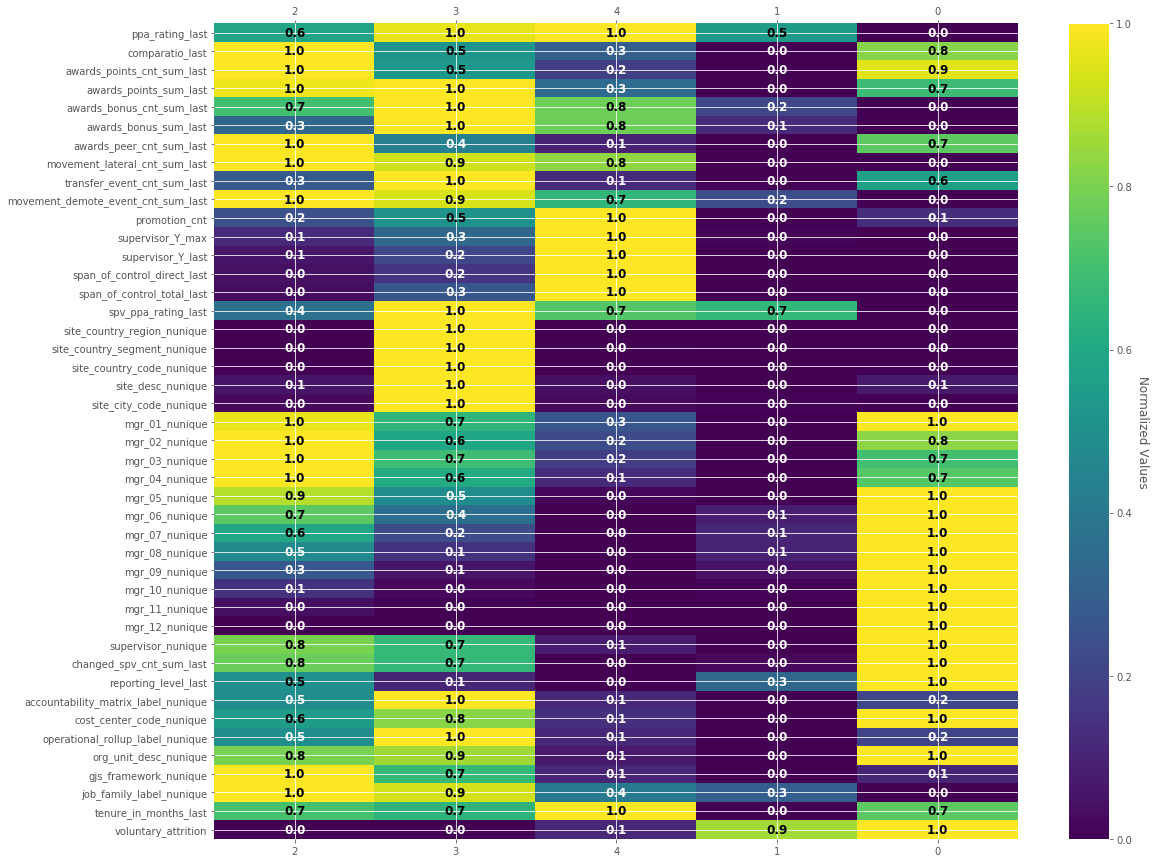

In [41]:
# heatmap ny varable, cluster, and normalized mean value

kmeans.plot_means_heatmap(figsize=(18,15), annot=True)

### Conclusion:

We see very strong changes across cluster in many variables, this indicates we can derive good business insights using Kmean.

Before proceeding to evaluate the differet clusters witih the business  objectvie, we need to evaluate if a difernet model has a better performance.



# Agglomerative Clustering

In [43]:
# bese model for Agglomerative Clustering
 
ac = agh(X=X.astype(np.float)
               ,n_clusters= 5
               ,linkage='ward'
               ,scaled=True
               ,evaluate_by='voluntary_attrition'
               ,random_state=101
              )

  

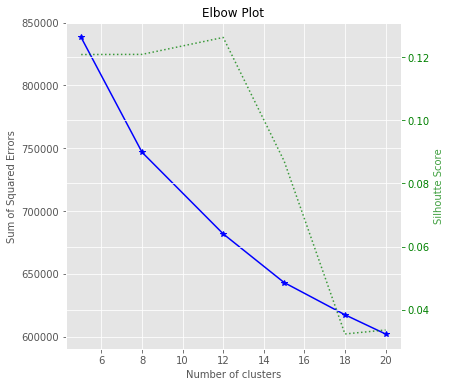

Wall time: 2min 20s


In [44]:
%%time

# Draw elbow to calculate the weights between Siloutted and Sum of Squares

cluster_ranges=[5,8,12,15,18,20]
ac.plot_elbow_curve(cluster_ranges=cluster_ranges
                    , second_metric='silhoutte'
                    , n_jobs=max_jobs
                    , figsize=(6,6)) # Elbow Curve with Helper function

range of slihoouete is .08, range of SSe = 230 = 0.19 normalized. So weight should be .19/.08 = 2.37. We keep the same weight = 2 for consistenct with the Kmean model


In [45]:
# Getting nubmer of observation per cluster to make sur eth emodel is not skewed and has a good separation between clauster
ac.train()
ac.cluster_obs_count()

labels
0     5747
1     5916
2     2831
3     1164
4    11616
Name: ppa_rating_last, dtype: int64

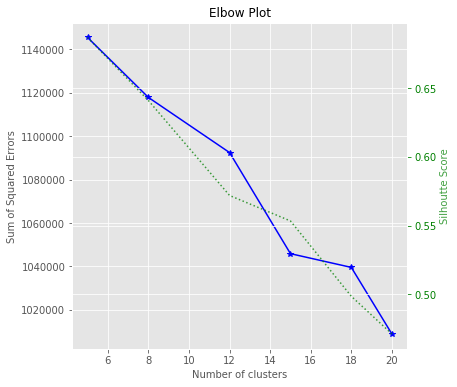

In [46]:
# Testing if average linkage has a better separation between cluasters

ac = agh(X=X.astype(np.float)
               ,n_clusters= 5
               ,linkage='average'
               ,scaled=True
               ,evaluate_by='voluntary_attrition'
               ,random_state=101
              )

cluster_ranges=[5,8,12,15,18,20]
ac.plot_elbow_curve(cluster_ranges=cluster_ranges, second_metric='silhoutte', n_jobs=max_jobs, figsize=(6,6)) # Elbow Curve with Helper function

In [47]:
# we see 5 cluslter has the bet slihoueette score, without impacting most of the Sum of Square  
ac.train()
ac.cluster_obs_count()

labels
0    27259
1       12
2        1
3        1
4        1
Name: ppa_rating_last, dtype: int64

Average method is returning only 1 cluster with >95% of the observation, we prefer using the ward method.
We tried also the other moethods and they all return bad separation between clusters

In [48]:
# Grid Search

# set up hyperparameter space 
space = [Integer(5, 20, name='n_clusters')
         #,Categorical(['ward'], name='linkage')
         ]

# Object to scale the inputs before training
weight_s = 2
weight_i = 1

# Define the objective function (loss function) to be minimized
@use_named_args(space)
def objective(**params):
    
    model =  cluster.AgglomerativeClustering(linkage='ward'
                                                     ,**params)
    
    std_scl = StandardScaler()
    piped_object = Pipeline([('scale', std_scl),  # do this
                             ('ac_model', model)]) # and then do this

    print("    ",end="")
    for key, value in params.items():
        print("{} = {}".format(key, value),end=', ')
    print("")
    piped_object.fit(Xbase.astype(np.float))
    
    measure_ibase =calc_SSB(Xbase,model.labels_,scaling=True)  
    measure_i =measure_ibase / Xbase_variance
    measure_sbase = mt.silhouette_score(Xbase,model.labels_,random_state=101)
    measure_s = -(measure_sbase+1)*.5 #range of silhoutte is -1 to 1
    print("    -> base inertia {} base silhouette {}".format( measure_ibase,measure_sbase))
    print("    -> norm inertia {} norm silhouette {}".format(measure_i,measure_s))
    measure =(measure_i*weight_i) +(measure_s*weight_s)
    return (measure)


In [49]:
ac_gp = gp_minimize(objective
                     ,space
                     ,n_random_starts=4 # 10 random points to start 
                     ,n_calls=10 # pick 25 points total (including n_random_starts) to dinf optimal combination of hyperparameters
                     ,verbose=True
                     ,n_jobs=max_jobs
                     ,random_state=101
                    )

Iteration No: 1 started. Evaluating function at random point.
    n_clusters = 13, 
    -> base inertia 669526.2836951488 base silhouette -0.13524184476386167
    -> norm inertia 0.5708872439167285 norm silhouette -0.43237907761806915
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 109.4677
Function value obtained: -0.2939
Current minimum: -0.2939
Iteration No: 2 started. Evaluating function at random point.
    n_clusters = 19, 
    -> base inertia 607800.4697140914 base silhouette -0.22890860384670683
    -> norm inertia 0.5182552850522018 norm silhouette -0.38554569807664657
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 105.1621
Function value obtained: -0.2528
Current minimum: -0.2939
Iteration No: 3 started. Evaluating function at random point.
    n_clusters = 20, 
    -> base inertia 602163.2656269015 base silhouette -0.22879756552011082
    -> norm inertia 0.513448591150701 norm silhouette -0.38560121723994456
Iteration No: 3 ended. Eva

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 5, 
    -> base inertia 838234.9677711917 base silhouette -0.04497451375040201
    -> norm inertia 0.714740648962204 norm silhouette -0.47751274312479897
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 111.7553
Function value obtained: -0.2403
Current minimum: -0.2939
Iteration No: 6 started. Searching for the next optimal point.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 20, 
    -> base inertia 602163.2656269015 base silhouette -0.22879756552011082
    -> norm inertia 0.513448591150701 norm silhouette -0.38560121723994456
Iteration No: 6 ended. Search finished for the next optimal point.
Time taken: 97.2503
Function value obtained: -0.2578
Current minimum: -0.2939
Iteration No: 7 started. Searching for the next optimal point.
    n_clusters = 10, 
    -> base inertia 711882.136522579 base silhouette -0.13714151071514166
    -> norm inertia 0.6070029524008544 norm silhouette -0.43142924464242915
Iteration No: 7 ended. Search finished for the next optimal point.
Time taken: 110.7473
Function value obtained: -0.2559
Current minimum: -0.2939
Iteration No: 8 started. Searching for the next optimal point.
    n_clusters = 15, 
    -> base inertia 643136.2417355294 base silhouette -0.10322129135690453
    -> norm inertia 0.5483851574593823 norm silhouette -0.44838935432154775
Iteration No: 8 ended. Search finished for the next optimal point.

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


    n_clusters = 15, 
    -> base inertia 643136.2417355294 base silhouette -0.10322129135690453
    -> norm inertia 0.5483851574593823 norm silhouette -0.44838935432154775
Iteration No: 9 ended. Search finished for the next optimal point.
Time taken: 109.0061
Function value obtained: -0.3484
Current minimum: -0.3484
Iteration No: 10 started. Searching for the next optimal point.
    n_clusters = 16, 
    -> base inertia 632661.881031995 base silhouette -0.2252265750860492
    -> norm inertia 0.5394539488430031 norm silhouette -0.3873867124569754
Iteration No: 10 ended. Search finished for the next optimal point.
Time taken: 113.6387
Function value obtained: -0.2353
Current minimum: -0.3484


In [50]:
#skopt.plots.plot_objective(ac_gp, size=4, dimensions=['n_clusters'])

#can't draw influence plot as we have only one dimention

In [51]:
print('Best score: {} | Best params: {}'.format(ac_gp.fun, ac_gp.x))

Best score: -0.3483935511837132 | Best params: [15]


# Dendogram

In [52]:
#Scaling X

std_scl = StandardScaler()
Xbase_scale =std_scl.fit(Xbase).transform(Xbase)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [53]:
import scipy.cluster.hierarchy as shc
Z=shc.linkage(Xbase, method='ward')  

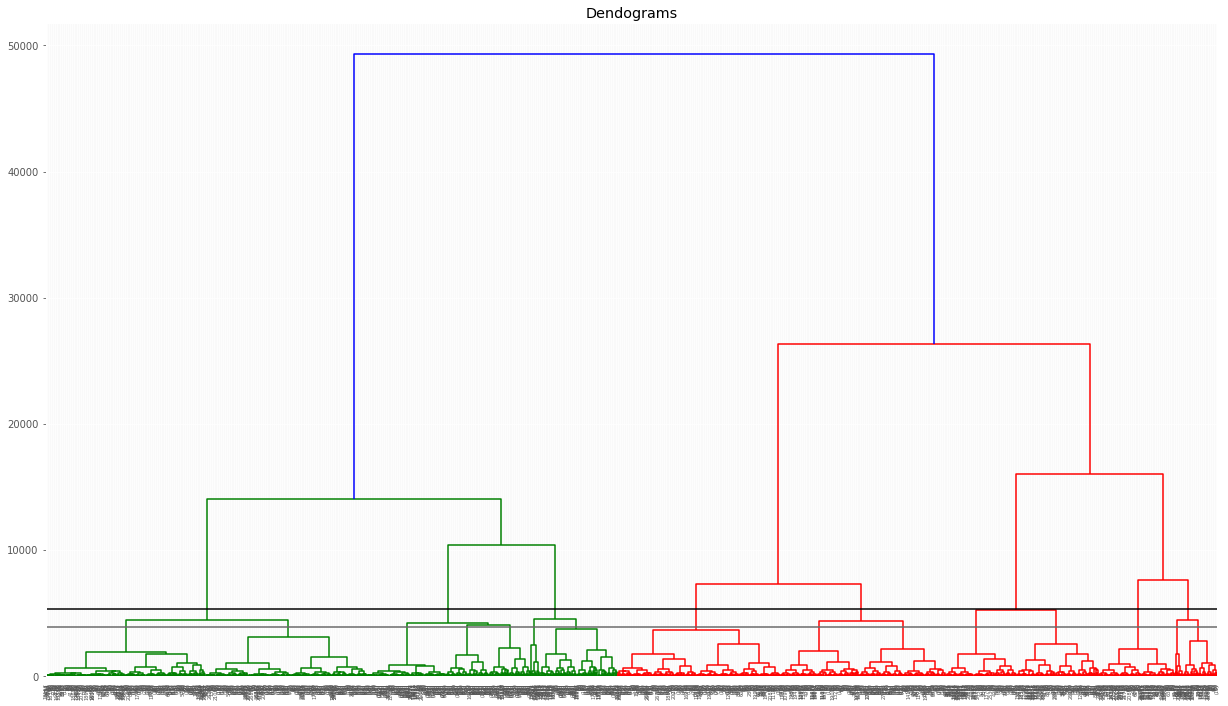

In [54]:
plt.figure(figsize=(21, 12))
plt.title("Dendograms")
dend = shc.dendrogram(Z,truncate_mode='level',p=10) #limiting to 10 levels for visiblity
plt.axhline(y=5300, c='k')
plt.axhline(y=3900, c='dimgray')

The first line at distance = 5300 includes 8 clusters, while the line at 3900 includes 15 clusters (as of the grid-seaych)
There is not much gain on distance  between the two line, but the number of clusters increase substantially, for the business point of view we prefer to have a smaller number of clusters. Hence, we can use a total of 8 cluster for this model.

### Evaluation
* Based on this data, best tradeoff is at K = 10
* **Hence we deicded to pick this value**

plot_elbow_curve(hac_ward.cluster_obj,X=kmeans.merged_scaled_data.drop(['labels','voluntary_attrition'],axis=1)
                 ,cluster_ranges=cluster_ranges
                 ,second_metric='silhoutte' 
                 ,n_jobs=30,figsize=(6,6))
plt.show()

In [55]:
# defining model with the best parameters

n_clusters = 8 #ac_gp.x[0]
ac = agh(X=X.astype(np.float)
               ,n_clusters= n_clusters
               ,linkage="ward"
               ,scaled=True
               ,evaluate_by='voluntary_attrition'
               ,random_state=101
              )

ac.train().evaluate_fit()

Silhouette Coefficient: 0.12088976003290226


Lower 

#### Evaluating Observations and Feature Means in each Cluster

In [56]:
ac.cluster_obs_count()

labels
0     1955
1     5333
2     2831
3     1164
4    11616
5      414
6     3223
7      738
Name: ppa_rating_last, dtype: int64

In [57]:
ac.cluster_means()

labels,7,2,3,1,0,6,4,5
ppa_rating_last,3.502710,3.576475,3.551546,3.423120,3.373657,3.418089,3.426696,3.236715
comparatio_last,1.027960,0.978015,0.985059,0.993768,1.010758,0.977001,0.964176,1.006314
awards_points_cnt_sum_last,4.432249,2.749912,3.496564,5.530471,2.082864,1.091530,1.756026,4.772947
awards_points_sum_last,274.837398,175.431296,244.501718,238.103319,103.605627,71.340056,101.716942,187.067633
awards_bonus_cnt_sum_last,1.126016,1.069940,0.855670,0.556347,0.374425,0.279553,0.311639,0.041063
awards_bonus_sum_last,4.250728,6.801165,3.489200,1.173235,1.337706,1.085031,0.916175,0.064810
awards_peer_cnt_sum_last,1.597561,0.855528,1.158935,2.158447,0.773402,0.426621,0.563447,1.572464
movement_lateral_cnt_sum_last,1.054201,0.171671,0.243986,0.053816,0.157033,0.631399,0.044852,0.135266
transfer_event_cnt_sum_last,1.311653,0.176263,1.077320,0.170823,0.267008,0.822836,0.056818,0.739130
movement_demote_event_cnt_sum_last,0.131436,0.007065,0.073024,0.008626,0.458824,0.000310,0.000086,0.007246


#### Evaluating cluster in terms of features

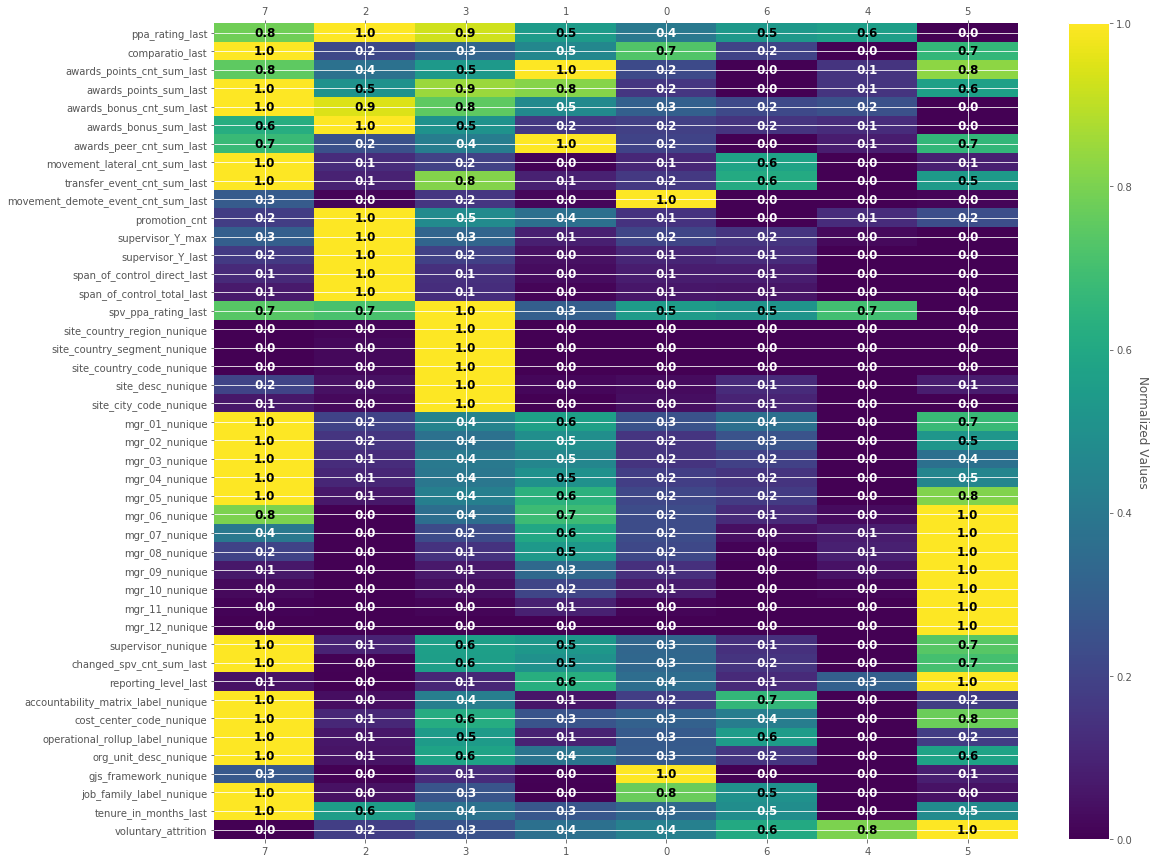

In [58]:
ac.plot_means_heatmap(figsize=(18,15), annot=True)

Wall time: 4.39 s


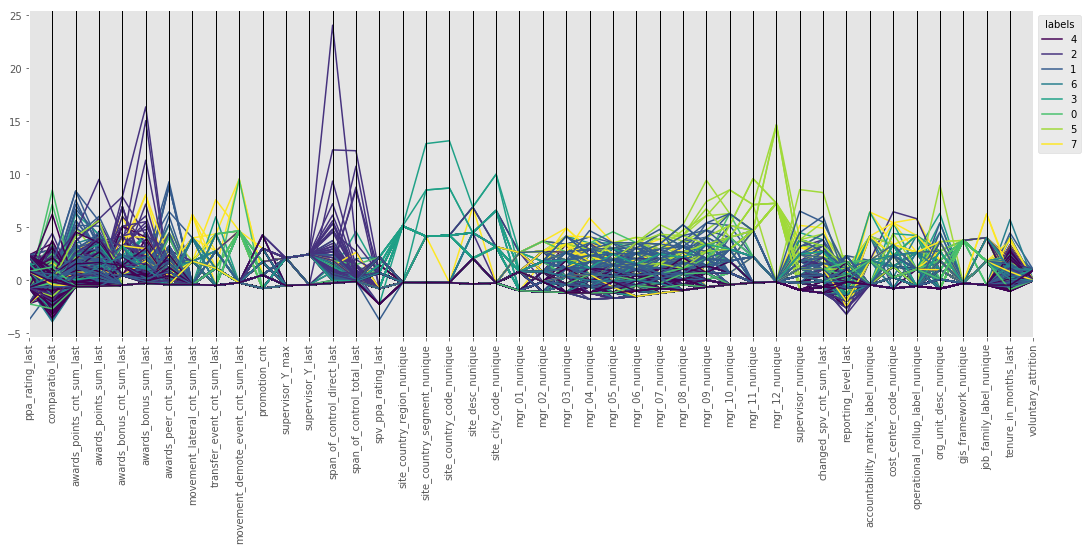

In [59]:
%%time
ac.plot_parallel_coordinates(scaled=True, xrot=90, figsize=(18,6))

### Conclusion 

* The clustering using Complete and Average Linkage is not as great as that using Ward. The reason is that most points are getting classified into just 1 cluster. 
* Ward is giving a better distribution of clusters (compared to Complete and Average).
* Ward is similar to KNN clustering in end results. 


### <i>Final Model</i><a class="anchor" id="M1A_Final"></a>


<font color = coral> Describe your results. What findings are the most interesting and why?</font>

Text goes here to talk about the results and what was interesting.

**We can conclude that the text goes here.**
<br>



<font color = coral>Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).</font>


We used external validation measures to extract insights from the clusters. In particular, we looked at the distribution of the **voluntary_attrition** variable across the various clusters. We first arranged the clusters from low to high values of **voluntary_attrition**. From there, we compared the characteristics of individual attributes within each cluster to see if we could extract any meaningful insight.

We compared the characteristics of the features across the clusters by looking at the mean of the feature values in each cluster. Since we used globular clustering methods, this seemed to be a valid means of comparing the features across the clusters.

However, since we were trying to compare over 40 features across 5 clusters, using a tabular format was not very easy. Hence we developed a special function in the cluster helper object to visualize a heatmap of the cluster means.

For plotting this heatmap, we performed a row-wise scaling (min-max) of the cluster means. This ensured that all the values in the heatmap were between 0 and 1, and that all values could be displayed on a single heatmap with a common scale. For example, for awards_points_cnt_sum_last, cluster 2 had the highest value so its value in the heatmap would translate to 1. Cluster 1 had the lowest value so its value on the heatmap would translate to 0. All other clusters would have values in the heatmap ranging between 0 and 1 depending on their relative position. Similarly, for mgr_11_nunique, cluster 0 has the highest value so its corresponding value in the heatmap would be 1. Cluster 1 had the lowest value so its corresponding value in the heatmap would correspond to 0. All other clusters are also showing a value of 0 since their absolute value is very close to the minimum value for this feature.

Another important thing to note is that while **voluntary_attrition** was not used to cluster the data, we do compare the distribution of this variable across the final clusters to evaluate potentiality of features correlating to attrition. Hence we included the distribution of this variable across the clusters in the heatmap as well (last row). Moreover, the clusters are also ordered by this variable from low to high (mean) attrition. 



<b> INSERT FIGURE</b>


The above methodology allows us to quickly compare the features across the clusters and find features that are correlated to higher attrition.

For example, clusters 0 and 1 have the highest relative attrition while clusters 2, 3 and 4 have relatively lower attrition. Since we are doing min-max scaling in the heatmap, just looking at the colors and values in the heatmap could be misleading (since a min value of 0.2 would translate to 0 and a max value of 0.21 would translate to 1, although they may not be practically different). Hence we should always compare this back to the tabular results. Indeed, these findings hold true (tabular view above heatmap). Clusters 0 and 1 have a mean attrition of 28% and 27% respectively whereas clusters 2, 3, and 4 have a relatively lower attrition between 16% and 18%.

By looking at the feature means between cluster groups (0,1) and (2,3,4) we can gain some valuable insights. For example, cluster 0 seems to be the only cluster which has a relatively high number of managers from level 8 onwards.
All other clusters do not have very many managers at such low levels. This implies that the employees in cluster 0 are low level employees. 

Cluster 1 seems to be unique as well since it consists of employees who have not received many bonus awards (<TODO ADD VARIABLES HERE>). They also have the lowest average tenure of all the clusters at around 52 months (compared to > 90 months for all other clusters).

Cluster 3 seems to consist of employees who have worked in multiple countries (<TODO ADD VARIABLES HERE>)

Cluster 4 seems to consist of employees who are in a supervisory role as indicated by the (<TODO ADD VARIABLES HERE>) variables.

Cluster 2 seems to consist of employees who have the highest bonus and peer recoganized awards (as indicated by the (<TODO ADD VARIABLES HERE>) variables). It seems that this group has the highest comparatio (compensation), but the heatmap is a little misleading here as the difference between the highest (1.01) and lowest (0.97) values is not much and not practically significant.



<b> Accommodate: moving to positions of best fit/interest? (3); train to be leaders? (4); spur friendly competition? (2); hard to say anything about retention (0, 1) as it's cyclical -- retain employees to spark retention in other employees </b>

<b> Cluster 0 is only cluster with value for mgr_12 -> that job level highly is associated with attrition; has high values for 10, 11 -- farther removed from top -> higher attrition </b>
Text goes here 




<font color = coral> Describe your results. What findings are the most interesting and why?</font>





**BONUS:**

From the above results we find some interesting associations. From cluster 0, we find that being in a lower level in the hierarchy is associated with a higher attrition rate. What is even more interesting is that this group of employees were given decent award points (small rewards of less than $200 value) but very low bonus (higher value award). Hence we can draw insights that providing higher award is probably not a substitute for a bonus and may not be enough to make employees feel appreciated enough to stay. (TODO: See if you want to rephrase this)

This fact is also reinforced from cluster 1, where employees have not received very many awards, bonuses or even peer recognition, and again this group has some of the highest average attrition.


**TENURE:**

Cluster 1 shows another interesting (though not surprising finding). As explained above, employees in this bucket had the lowest tenure of all groups and some of the highest attrition. Althouh we do not have an age related variable in our dataset, we can speculate with high certainity that this corelated highly with youngr employees. This jives well with our intuition that younger employees are more flexible and more open to moving around and this could be why this group has a higher attrition. 

Since this group had some of the lowest bonus awards, it would be interesting to see if the attrition reduces for this group in the future if management institutes policies to award and attract these employees with more bonuses.


**SUPERVISORY ROLES and INTER COUNTRY TRANSFERS:**
Another interesting association is between being in a supervisory role and having lower attrition as indicated by cluster 4. This is also intuitive since being in a supervisory role might mean more trust in the employee which makes the employee feel appreicted. 

Similarly, an employee who is approved for inter country transfers is usually trusted by the employer for a high profile role and this in turn helps the employee feel appreciated.

Both these factors are hence likely to be associated with lower attrition which is what we see in our results as well.





## <font color = maroon>Deployment</font> <a class="anchor" id="Section8"></a>

The purpose of this analysis is to look for opportunities for the human resources team to understand symptoms of attrition in order to develop early intervention processes. The analysis included additional data, provided by the SME and not used in previous phases of the study, that offered a different point of view relevant for our purposes of understanding **voluntary attrition**. Initially the clustering was conducted without the data and the results were in line with expectations and did not add to the understanding of the core issue. 

By using the voluntary attrition indicator we were able to see some less obvious connections, such as attrition being associated with peer acknowledgement versus "official" acknowledgment. This was valuable information, as the company encourages peer acknowledgment. However,the data suggests that it is no substition for official recognition if the desire is to reduce attrition. There is important information, so an action item has been noted by the SME to include this as verbiage in supervisor and managment training.

Based on our findings, we recommend the Company rerun this analysis on an annual basis, as it will require some review and tuning. As the effect of other changes implemented as part of this study will take some time to realize, this cluster analysis should be included as part of the fiscal year end process to provide direction for new goals.

Additionally, a variable that should be included is an indicator to show whether the employee was inlcuded in the pilot for attrition reduction. This will be helpful to see if the needs of the pilot group to reduce attrition are different from the rest of the organization and shed light on changes, success, and additional changes needed.

This information will be aggregated and used to further tune the model. The updated model and significant changes, as well as any noted differences in pilot areas, presented to the human resources leadership and others involved in the at



[Back to Table of Contents](#TOC)



## <font color = maroon>Exceptional Work</font> <a class="anchor" id="Section9"></a>



### <i>Exceptional Work One</i><br> <a class="anchor" id="EW_1"></a>

In this clustering analysis, we sought an alternative method to conveying our cluster outputs in a meaningful and insight-driven mode. As a result, we elected to use a heatmap with scaled clusters to generally depict any differences between our clusters in a visual manner. 

The drawback here is that our values are scaled via min-max scaling. Because of this, our heatmap may show massive differences when there is virtually no practical difference. For example, for a range with a minima of 0.20 and a maxima of 0.21, our heatmap would show a large difference between these two even though their actual difference is very minimal. 

To extract meaning out of our heatmaps, we cross-compare our visual results to our tabular results, focusing on attributes that appear to have large differences between clusters. This allows us to focus our attention towards potentially influential attributes while diverting our attention away from iinherent noise. 


### <i>Exceptional Work Two</i><br> <a class="anchor" id="EW_2"></a>

In order to perform our clustering practice (as well as previous lab activities), we had to import a wide variety of libraries and many user defined functions. These themselves are by no means troublesome. However, this does mean that many cell blocks dedicated to loading packages and defining functions are introduced. As a result, our notebook becomes inundated with many cells that, while essential, provide no meaningful value to our purpose and subsequently drowns the reader in blocks of code. 

To amend this, Nikhil has compiled many of the Python packages and user defined functions that we have used for the purposes of this course and developed a package (<b>more</b>) that allows the same functionality at a fraction of the code. 

One (minor) drawback is the additional time needed to maintain, update, and redistribute the package for proper usage. However, this package has been beyond useful in the course of our lab. It has also been distributed to our peers across all sections to help condense their code as well (sharing is caring). 


[Back to Table of Contents](#TOC)


## <font color=maroon>Conclusion</font><a class="anchor" id="Section10"></a>

The cluster analysis was a natural extention of the prior classification phases of this study where we sought to indentify candidates for promotion and propose a promotion window for promoted candidates. In this phase, we confined our study to only promoted candidates and search for indications for voluntary attrition in order to identify opportunities to reduce volunatry attrition. Based on the cluster analysis, the K-Means clustering provided the best results in terms of interpretable, logical clusters that provided both expected and new insights into employee attrition. The clustering uncovered opportunities around recognition and incentives that can be incorporated and tested in the performance management process, particularly for candidates for promotion and tracked as part of the overall employee retention program. 




[Back to Table of Contents](#TOC)